In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt;
import seaborn as sns;

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.linear_model import LogisticRegression;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split, GridSearchCV;
from sklearn.metrics import accuracy_score, roc_curve;
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn import metrics



import warnings;
warnings.filterwarnings("ignore");

# New Section

In [ ]:
df = pd.read_csv("Final Dataset.csv");
df.head()

FileNotFoundError: ignored

# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1220 non-null   int64  
 1   sex       1220 non-null   int64  
 2   cp        1220 non-null   int64  
 3   trtbps    1220 non-null   int64  
 4   chol      1220 non-null   int64  
 5   fbs       1220 non-null   int64  
 6   restecg   1220 non-null   int64  
 7   thalachh  1220 non-null   int64  
 8   exng      1220 non-null   int64  
 9   oldpeak   1220 non-null   float64
 10  slp       1220 non-null   int64  
 11  output    1220 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 114.5 KB


Missing Value Analysis


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
output      0
dtype: int64

Unique Value Analysis

In [ ]:
for props in df.columns:
    print("{} - {}".format(props, df[props].value_counts().shape[0]))

age - 50
sex - 2
cp - 4
trtbps - 67
chol - 222
fbs - 2
restecg - 3
thalachh - 119
exng - 2
oldpeak - 53
slp - 3
output - 2


Categorical Value Analysis

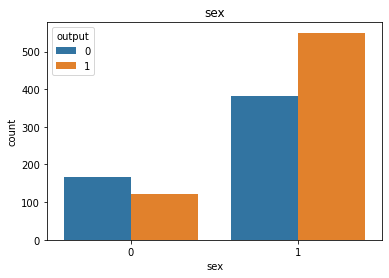

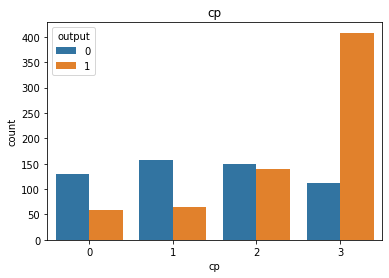

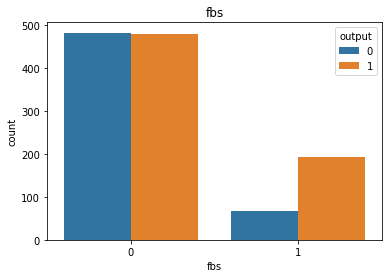

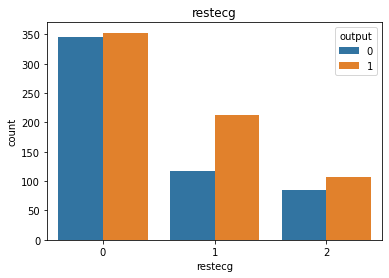

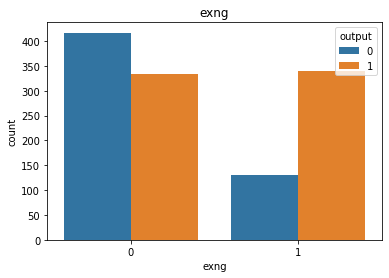

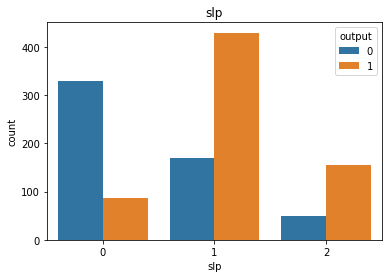

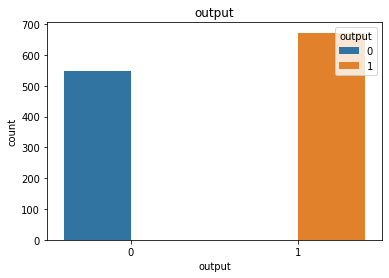

In [ ]:
categoryList = ["sex", "cp", "fbs", "restecg", "exng", "slp", "output"];
dfCategory = df.loc[:, categoryList];
for i in categoryList:
    plt.figure();
    sns.countplot(x = i, data = dfCategory, hue = "output");
    plt.title(i);

Numeric Value Analysis

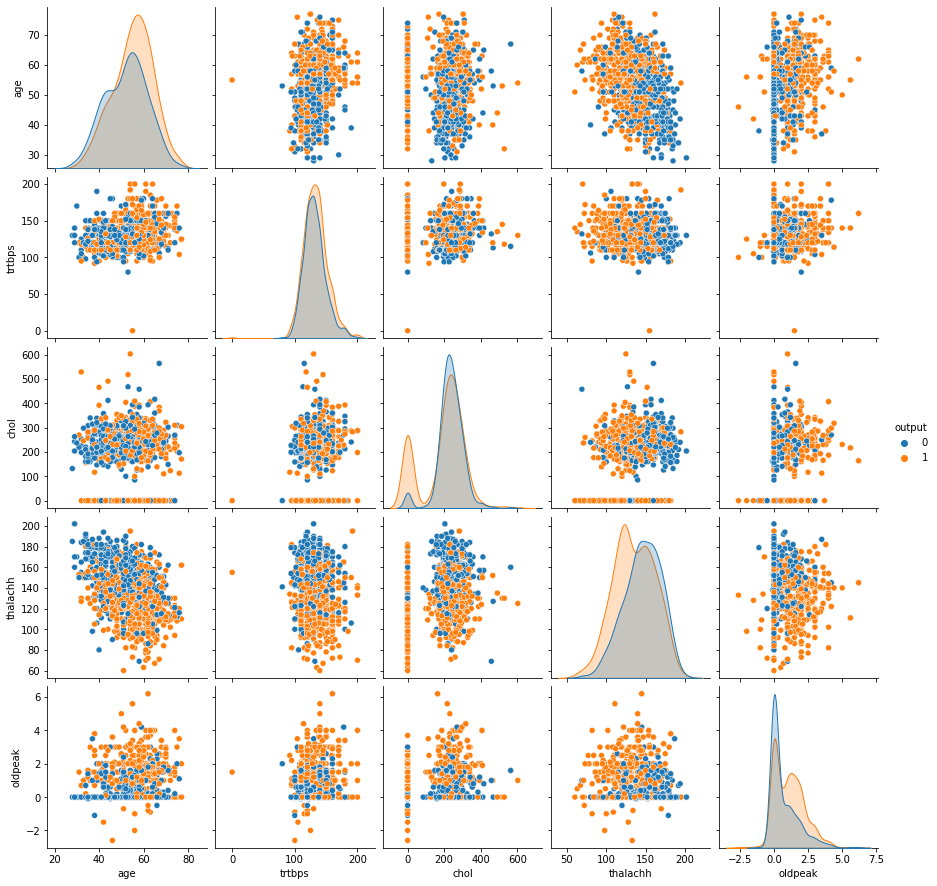

In [ ]:
numericList = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"];
dfNumeric = df.loc[:, numericList];
sns.pairplot(dfNumeric, hue = "output", diag_kind = "kde");
plt.show();

Standardization

In [ ]:
scaler = StandardScaler();
scaledArray = scaler.fit_transform(df.loc[:, numericList[:-1]]);
pd.DataFrame(scaledArray).describe()

,0,1,2,3,4
count,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03
mean,3.738358e-16,6.007035e-16,2.022062e-16,-8.363073e-16,6.643138e-17
std,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00
min,-2.755576e+00,-7.235108e+00,-2.097916e+00,-3.143904e+00,-3.228964e+00
25%,-7.212347e-01,-6.676877e-01,-2.251981e-01,-7.064044e-01,-8.479257e-01
50%,2.825962e-02,-1.204027e-01,1.732525e-01,4.057129e-02,-2.984555e-01
75%,6.706833e-01,4.268823e-01,5.816644e-01,7.875470e-01,6.173284e-01
max,2.490884e+00,3.710592e+00,3.908727e+00,2.438756e+00,4.829934e+00


Box Plot Analysis

In [ ]:
scaledDF = pd.DataFrame(scaledArray, columns = numericList[:-1]);
scaledDF = pd.concat([scaledDF, df.loc[:, "output"]], axis = 1);
scaledDF.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.991895,0.700525,0.223059,0.394402,1.258377,1
1,-1.791941,-0.120403,0.392400,1.849039,2.357318,1
2,-1.363658,-0.120403,-0.065818,1.259321,0.434172,1
3,0.242401,-0.667688,0.252943,1.495208,-0.115299,1
4,0.349471,-0.667688,1.428372,0.905491,-0.298455,1


In [ ]:
dataMelt = pd.melt(scaledDF, id_vars = "output", var_name = "features", value_name = "value");
dataMelt.head(20)

,output,features,value
0,1,age,0.991895
1,1,age,-1.791941
2,1,age,-1.363658
3,1,age,0.242401
4,1,age,0.349471
5,1,age,0.349471
6,1,age,0.242401
7,1,age,-1.042447
8,1,age,-0.185882
9,1,age,0.349471


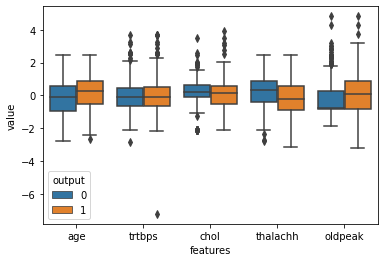

In [ ]:
plt.figure();
sns.boxplot(x = "features", y = "value", hue = "output", data = dataMelt);
plt.show();

Correlation Analysis


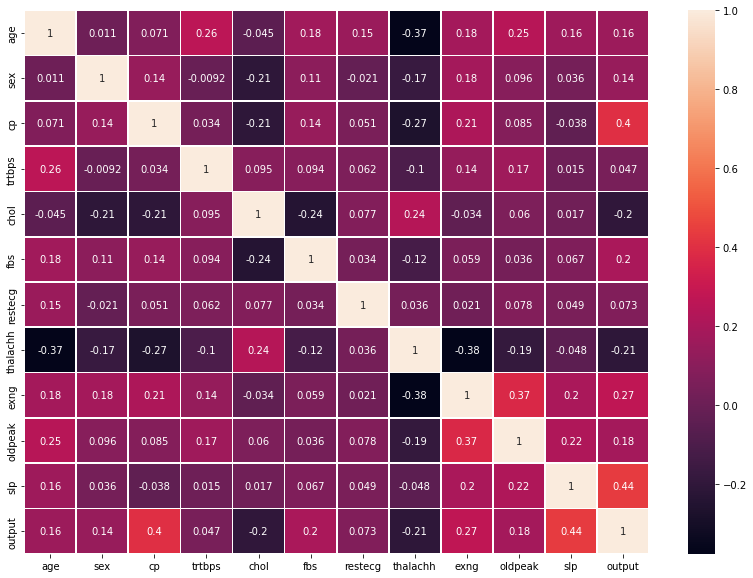

In [ ]:
# plt.figure(figsize = (14,10));
# sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7);

plt.figure(figsize=(14, 10))
# matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,
             linewidth=.8, cmap="rocket");

In [ ]:
categoryList

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'output']

Drop Uncorrelated features

In [ ]:
correlations = pd.DataFrame(np.abs(df.loc[:, categoryList].corr()["output"]) < 0.10)
uncorrelatedCategoricalFeatures = correlations[correlations["output"] == True].index;
df.drop(uncorrelatedCategoricalFeatures, axis = 1, inplace = True);
df.drop('thalachh',axis=1,inplace=True)
print(categoryList)
print(df)
for items in uncorrelatedCategoricalFeatures.values:
    print(items,0)
    categoryList.remove(items);
numericList.remove('thalachh')

# Numerical Features
correlations = pd.DataFrame(np.abs(df.loc[:, numericList].corr()["output"]) < 0.15)
uncorrelatedNumericFeatures = correlations[correlations["output"] == True].index;
df.drop(uncorrelatedNumericFeatures, axis = 1, inplace = True);

numericList = ["age", "trtbps", "chol", "oldpeak"];
for items in uncorrelatedNumericFeatures.values:
    print(items,1)
    numericList.remove(items);

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'output']
      age  sex  cp  trtbps  chol  fbs  exng  oldpeak  slp  output
0      63    1   3     145   233    1     0      2.3    0       1
1      37    1   2     130   250    0     0      3.5    0       1
2      41    0   1     130   204    0     0      1.4    2       1
3      56    1   1     120   236    0     0      0.8    2       1
4      57    0   0     120   354    0     1      0.6    2       1
...   ...  ...  ..     ...   ...  ...   ...      ...  ...     ...
1215   45    1   0     110   264    0     0      1.2    1       1
1216   68    1   3     144   193    1     0      3.4    1       1
1217   57    1   3     130   131    0     1      1.2    1       1
1218   57    0   1     130   236    0     0      0.0    1       1
1219   38    1   2     138   175    0     0      0.0    0       0

[1220 rows x 10 columns]
restecg 0
trtbps 1


In [ ]:
categoryList

['sex', 'cp', 'fbs', 'exng', 'slp', 'output']

Outlier Detection

In [ ]:
dfNumeric = df.loc[:, numericList];

for items in numericList:
    currentItem = dfNumeric[items];
    q1 = np.percentile(currentItem, 25)  # Q1
    q3 = np.percentile(currentItem, 75)  # Q3
    iqr = q3-q1;
    upperLimit = q3 + 2.5 * iqr;
    lowerLimit = q1 - 2.5 * iqr;
    
    upperSamples = np.where(currentItem >= upperLimit);
    lowerSamples = np.where(currentItem <= lowerLimit);
    
    try:
        df.drop(upperSamples[0], inplace = True);
    except: 
        print("Key Error: {} not fount in axis".format(upperSamples[0]));

    try:
        df.drop(lowerSamples[0], inplace = True);
    except: 
        print("Key Error: {} not fount in axis".format(lowerSamples[0]));

Encoding Categorical Value

In [ ]:
dfEnc = pd.get_dummies(df, columns = categoryList[:-1], drop_first = True);
print("DF Cols: ", df.columns);
print("dfEnc Cols: ", dfEnc.columns);
dfEnc.head()

DF Cols:  Index(['age', 'sex', 'cp', 'chol', 'fbs', 'exng', 'oldpeak', 'slp', 'output'], dtype='object')
dfEnc Cols:  Index(['age', 'chol', 'oldpeak', 'output', 'sex_1', 'cp_1', 'cp_2', 'cp_3',
       'fbs_1', 'exng_1', 'slp_1', 'slp_2'],
      dtype='object')


,age,chol,oldpeak,output,sex_1,cp_1,cp_2,cp_3,fbs_1,exng_1,slp_1,slp_2
0,63,233,2.3,1,1,0,0,1,1,0,0,0
1,37,250,3.5,1,1,0,1,0,0,0,0,0
2,41,204,1.4,1,0,1,0,0,0,0,0,1
3,56,236,0.8,1,1,1,0,0,0,0,0,1
4,57,354,0.6,1,0,0,0,0,0,1,0,1


In [ ]:
x = dfEnc.drop(["output"], axis = 1);
y = dfEnc["output"];

Standardization

In [ ]:
scaler = StandardScaler();
x[numericList[:-1]] = scaler.fit_transform(x.loc[:, numericList[:-1]]);
x.head()

,age,chol,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,exng_1,slp_1,slp_2
0,0.993985,0.244850,2.3,1,0,0,1,1,0,0,0
1,-1.792326,0.418406,3.5,1,0,1,0,0,0,0,0
2,-1.363662,-0.051214,1.4,0,1,0,0,0,0,0,1
3,0.243824,0.275478,0.8,1,1,0,0,0,0,0,1
4,0.350990,1.480155,0.6,0,0,0,0,0,1,0,1


Dividing datat into train and test set

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 3);

In [ ]:
print(xTest)

          age      chol  oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  exng_1  \
856 -0.077673 -0.347279      0.3      1     0     1     0      1       0   
520  0.136659 -0.132887      0.0      1     1     0     0      0       0   
765 -0.292005 -2.133877      0.0      1     0     0     1      0       0   
528 -0.077673 -0.143097      0.0      1     0     1     0      0       0   
939 -1.149331  0.959490      1.2      1     0     0     1      0       0   
..        ...       ...      ...    ...   ...   ...   ...    ...     ...   
163 -1.685160 -0.347279      0.0      1     0     1     0      0       0   
51   1.315482  0.949281      0.4      1     0     0     0      0       0   
31   1.208316 -0.326861      0.4      1     0     0     0      0       0   
545 -1.149331  0.581752      0.0      0     1     0     0      0       0   
176  1.101151  1.286182      0.0      1     0     1     0      0       0   

     slp_1  slp_2  
856      0      0  
520      0      0  
765      0      0  
528    

Logistic Regression

In [ ]:
logReg = LogisticRegression();
logReg.fit(xTrain, yTrain); # Train the model
y_pred_prob = logReg.predict_proba(xTest); # Test the model
y_pred = np.argmax(y_pred_prob, axis = 1);

In [ ]:
testResult = pd.DataFrame(y_pred_prob);
testResult["RiskyOrNot"] = y_pred;
testResult.head()

,0,1,RiskyOrNot
0,0.725412,0.274588,0
1,0.882507,0.117493,0
2,0.400038,0.599962,1
3,0.858172,0.141828,0
4,0.234723,0.765277,1


Calculating Accuracy

In [ ]:
print("Test Accuracy: {}".format(accuracy_score(y_pred, yTest)));

Test Accuracy: 0.8016528925619835


KNN Model

In [ ]:

kneighbourmodel = KNeighborsClassifier();
kneighbourmodel.fit(xTrain, yTrain); # Train the model
y_pred_prob = kneighbourmodel.predict_proba(xTest); # Test the model
y_pred = np.argmax(y_pred_prob, axis = 1);

In [ ]:
print("Test Accuracy: {}".format(accuracy_score(y_pred, yTest)));

Test Accuracy: 0.743801652892562


LDA Model

In [ ]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(xTrain, yTrain)
X_test = lda.transform(xTest)

In [ ]:
y_pred = lda.predict(xTest)
print(accuracy_score(yTest, y_pred))

0.7975206611570248


Random Forest


In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(xTrain, yTrain)  
y_pred= classifier.predict(xTest)  
print(accuracy_score(yTest, y_pred))

0.7644628099173554


SVM

In [ ]:
svc_model = SVC(C= .1, kernel='linear', gamma = 10)
svc_model.fit(xTrain, yTrain)
  
prediction = svc_model .predict(xTest)
# check the accuracy on the training set
print(svc_model.score(xTest, yTest))

0.7727272727272727


In [ ]:
print(confusion_matrix(yTest,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, y_pred)))

[[ 84  28]
 [ 29 101]]
Root Mean Squared Error: 0.48532173872869594
